# Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years


# 1. Importing necessary libraries

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2. Collection of Data

In [2]:
startup_data = pd.read_csv(r"D:\Data Science\DS Assignments\Multi_linear_regression\50_Startups.csv")
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 3. Data Understanding

## 3.1 Initial Analysis

In [3]:
startup_data.shape

(50, 5)

In [4]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# 3.2 Assumption Check

### 3.2.1 Linearity Test

In [5]:
startup_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

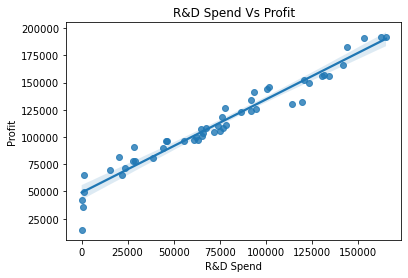

In [6]:
sns.regplot(x='R&D Spend', y='Profit', data=startup_data)
plt.title('R&D Spend Vs Profit')
plt.show()

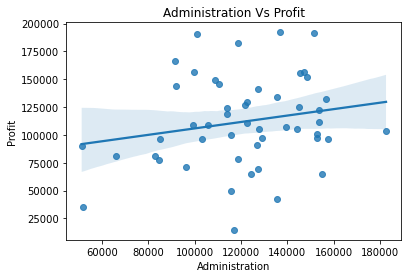

In [7]:
sns.regplot(x='Administration', y='Profit', data=startup_data)
plt.title('Administration Vs Profit')
plt.show()

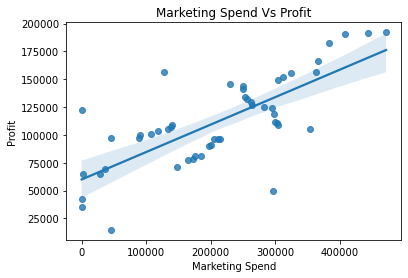

In [8]:
sns.regplot(x='Marketing Spend', y='Profit', data=startup_data)
plt.title('Marketing Spend Vs Profit')
plt.show()

## Linearity test is failed

In [9]:
startup_data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
startup_data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

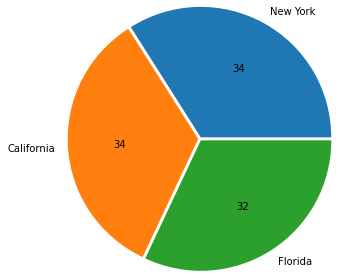

In [11]:
plt.pie(x=startup_data['State'].value_counts(), labels=['New York','California','Florida'], explode=[0.02,0.02,0.02], autopct='%.0f', radius=1.5)
plt.show()

### 3.2.2 Normality Test

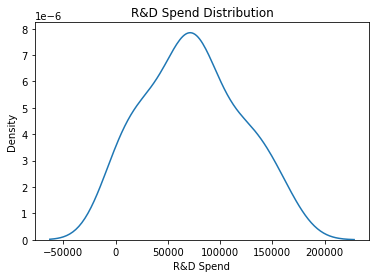

In [12]:
sns.kdeplot(x='R&D Spend', data=startup_data)
plt.title('R&D Spend Distribution')
plt.show()

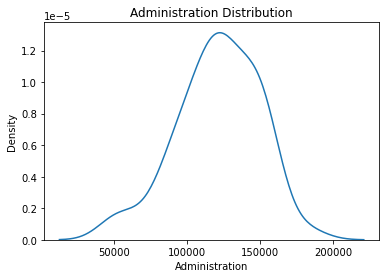

In [13]:
sns.kdeplot(x='Administration', data=startup_data)
plt.title('Administration Distribution')
plt.show()

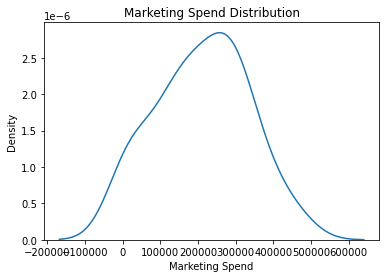

In [14]:
sns.kdeplot(x='Marketing Spend', data=startup_data)
plt.title('Marketing Spend Distribution')
plt.show()

## Normality test is failed

# Model Building

In [25]:
X=startup_data.drop(['Profit','State'], axis=1)
y=startup_data[['Profit']]

,R&D_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [27]:
X_train.shape,y_train.shape

((40, 3), (40, 1))

In [28]:
X_test.shape,y_test.shape

((10, 3), (10, 1))

# Model Training

In [22]:
#startup_data.columns=['R&D_Spend','Administration','Marketing_Spend','State','Profit']
#startup_data.columns
startup_data_new=startup_data.drop('State',axis=1)
startup_data_new.columns

Index(['R&D_Spend', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

In [24]:
linear_model = smf.ols(formula='Profit ~ R&D_Spend + Administration + Marketing_Spend', data = startup_data_new).fit()
linear_model

PatsyError: Error evaluating factor: NameError: name 'R' is not defined
    Profit ~ R&D_Spend + Administration + Marketing_Spend
             ^^^^^^^^^

In [33]:
linear_model_skl = LinearRegression()
linear_model_skl.fit(X_train,y_train)

LinearRegression()

In [35]:
linear_model_skl.coef_

array([[ 0.79608244, -0.06322462,  0.03024381]])

In [37]:
linear_model_skl.intercept_

array([54619.77543714])

# Model Testing

# Model Evaluation

# Model Deployment